In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import joblib
from word2number import w2n
import seaborn as sns
import math

In [2]:
df = pd.read_csv("data/hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
# fill missing values (NA)
df.isna().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [4]:
df.experience = df.experience.fillna("zero")
df["test_score(out of 10)"] = df["test_score(out of 10)"].fillna(math.floor(df["test_score(out of 10)"].median()))

In [5]:
df.isna().sum()

experience                    0
test_score(out of 10)         0
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [6]:
df['experience']

0      zero
1      zero
2      five
3       two
4     seven
5     three
6       ten
7    eleven
Name: experience, dtype: object

In [7]:
#convert experience to numerical values
df['experience_num'] = df['experience'].apply(w2n.word_to_num)
df['experience_num']

0     0
1     0
2     5
3     2
4     7
5     3
6    10
7    11
Name: experience_num, dtype: int64

In [8]:
y_col = 'salary($)'
cat_col = 'experience'
X_cols = [col for col in df.columns if col != y_col and col != cat_col]
X_cols

['test_score(out of 10)', 'interview_score(out of 10)', 'experience_num']

<Figure size 1000x600 with 0 Axes>

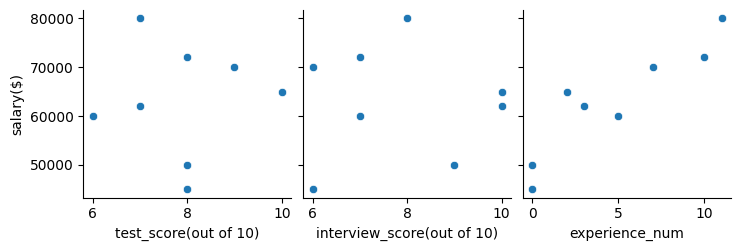

In [9]:
plt.figure(figsize=(10, 6))
#sns.pairplot(df, diag_kind='kde')
sns.pairplot(df, x_vars=X_cols, y_vars=[y_col]) #plot only against dependent variables
plt.show()

In [10]:
df[X_cols + [y_col]].corr()

,test_score(out of 10),interview_score(out of 10),experience_num,salary($)
test_score(out of 10),1.000000,0.130871,-0.221556,0.009965
interview_score(out of 10),0.130871,1.000000,-0.290480,0.037820
experience_num,-0.221556,-0.290480,1.000000,0.908017
salary($),0.009965,0.037820,0.908017,1.000000


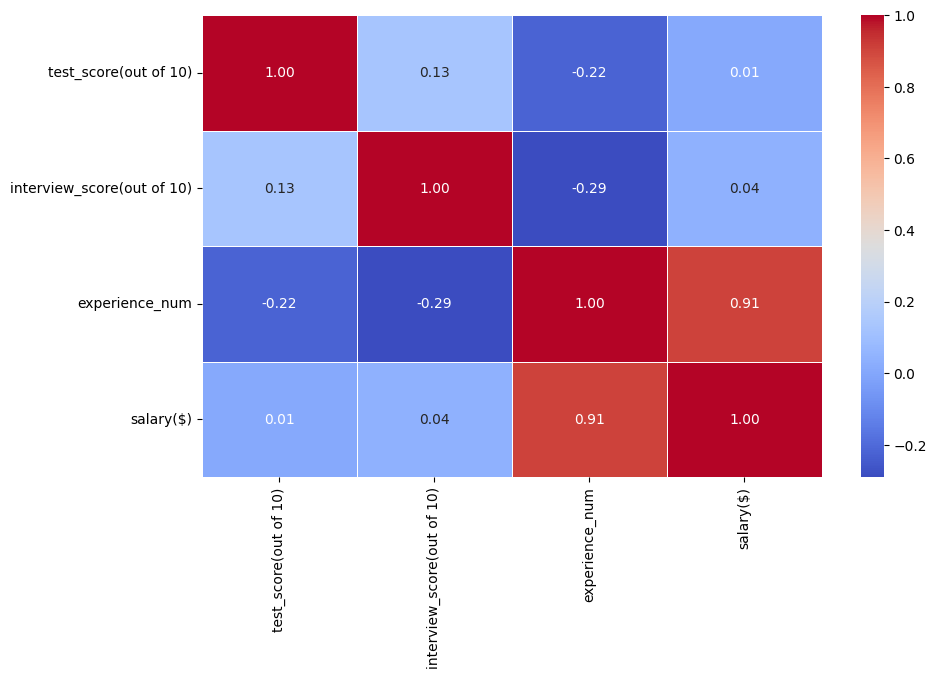

In [11]:
#Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[X_cols + [y_col]].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [12]:
# very high correlation b/w salary and exp_num

In [13]:
reg = linear_model.LinearRegression()

In [14]:
reg

LinearRegression()

In [15]:
reg.fit(df[X_cols], df[y_col])
reg

LinearRegression()

In [16]:
print(f"Regression coeficients (slope/ gradient of independent variables) : {reg.coef_}")
print(f"Regression intercept: {reg.intercept_}")

Regression coeficients (slope/ gradient of independent variables) : [1845.70596798 2205.24017467 2812.95487627]
Regression intercept: 17737.263464337702


In [17]:
df_test = pd.DataFrame({'test_score(out of 10)':[9, 10], 'interview_score(out of 10)': [6, 10], 'experience_num': [2,12]})
df_test

,test_score(out of 10),interview_score(out of 10),experience_num
0,9,6,2
1,10,10,12


In [18]:
df_test['predicted_sal'] = reg.predict(df_test)

In [19]:
df_test

,test_score(out of 10),interview_score(out of 10),experience_num,predicted_sal
0,9,6,2,53205.967977
1,10,10,12,92002.183406


In [20]:
# save trained model
joblib.dump(reg, "multivariate_model")

['multivariate_model']

In [21]:
# load trained model
model = joblib.load("multivariate_model")

In [22]:
model.coef_, model.intercept_

(array([1845.70596798, 2205.24017467, 2812.95487627]),
 np.float64(17737.263464337702))

In [24]:
model.predict(df_test[X_cols])

array([53205.96797671, 92002.18340611])